<a href="https://colab.research.google.com/github/Mahsa33/News-Classification/blob/main/News_Compitition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/compitition
!ls

/content/drive/MyDrive/Colab Notebooks/compitition
Data  DockerFile  News_Compitition.ipynb


In [86]:
!git --version

git version 2.34.1


In [ ]:
!git init
!git add News_Compitition.ipynb

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/Colab Notebooks/compitition/.git/


In [87]:
!git config --global user.email "mahsaasghari33@gmail.com"
!git config --global user.name "mahsa33"
!git add News_Compitition.ipynb
!git commit -m "Final Classification Model"

[master d11b0b6] Final Classification Model
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite News_Compitition.ipynb (93%)


In [ ]:
!git status

On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Data/

nothing added to commit but untracked files present (use "git add" to track)


In [3]:
!pip install hazm
!pip install arabic_reshaper
!pip install python-bidi

  Using cached arabic_reshaper-3.0.0-py3-none-any.whl (20 kB)


In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import collections
import torch
from hazm import Normalizer, word_tokenize, stopwords_list
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
!wget -P '/content/drive/MyDrive/Colab Notebooks/compitition/Data' 'https://drive.usercontent.google.com/download?id=1ljAg7S4y9t5b77pgQsLJJ6ITskcZn669&export=download&authuser=0&confirm=t&uuid=9364f9c5-ff6a-453b-bc9b-64263c7c630c&at=APZUnTU4dpH77Xee9zW2WPM6xyyF%3A1707396835037'

In [ ]:
#!unzip -d  '/content/drive/MyDrive/Colab Notebooks/compitition/Data' '/content/drive/MyDrive/Colab Notebooks/compitition/Data/download?id=1ljAg7S4y9t5b77pgQsLJJ6ITskcZn669&export=download&authuser=0&confirm=t&uuid=9364f9c5-ff6a-453b-bc9b-64263c7c630c&at=APZUnTU4dpH77Xee9zW2WPM6xyyF:1707396835037'

In [5]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/compitition/Data/train.csv')
train_data.head(10)

,title,subgroup,abstract,body
0,پلیس: جرائم خشن و مسلحانه در تهران کاهش یافته است,عمومی,آمارهای پلیس نشان می‌دهد که جرائم خشن و مسلحان...,رئیس پلیس آگاهی تهران بزرگ اعلام کرد که موضوع ...
1,"وزیر بهداشت:\r\nآغاز اجرای طرح جامع ""دارویار""/...",اخبار سلامت,هدف اصلی وزارت بهداشت از این طرح این است که پو...,"وزیر بهداشت جزییات طرح ""دارویار"" که اجرای آن آ..."
2,وزارت بهداشت: قیمت دارو برای مصرف کننده ثابت م...,اجتماعی,NaN,سخنگوی وزارت بهداشت، درمان و آموزش پزشکی در تو...
3,معاون رئیسی: مردم به زودی شاهد اثرات مثبت اقدا...,سیاسی,معاون امور مجلس رئیس جمهور: استان گیلان دارای ...,معاون رئیس جمهور گفت: دولت برنامه های راهبردی ...
4,دستگیری سارق ۲۰ هزار دلاری ارز دیجیتال در گلستان,اجتماعی,شهروندان توصیه‌های پلیس فتا را جدی بگیرند و در...,رییس پلیس فتا فرماندهی انتظامی گلستان گفت: سار...
5,رونمایی از آمبولانس حیات وحش استان بوشهر,محیط زیست,از همین رو پیشنهاد احداث یک واحد درمان و نقاهت...,در آئینی با حضور مدیرعامل صندوق ملی محیط زیست،...
6,معاون وزیر اطلاعات: فضای مجازی بلای خانمان سوز...,سیاسی,مقام معظم رهبری بیان کردند اگر رهبر نبودند مسئ...,معاون سیاسی، فرهنگی و اجتماعی وزارت اطلاعات گف...
7,آبکش شدن با 60 گلوله پلیس؛ تاوان فرار یک جوان ...,سیاسی,خانواده این جوان 25 ساله آمریکایی گفته اند رفت...,یک جوان سیاه پوست در شهر آکرون ایالت اوهایو آم...
8,درگذشت دانشجوی دانشگاه فرهنگیان,حوادث,"""متین حبیب لی"" دانشجومعلم رشته آموزش ابتدایی ۹...",دانشگاه فرهنگیان با صدور پیامی، درگذشت یکی از ...
9,پلیس فتا: تشدید مقابله با لایوهای غیر اخلاقی د...,اجتماعی,رصد این گونه جریانات غیر اخلاقی که مغایر با شئ...,معاون فرهنگی اجتماعی پلیس فتا فراجا از تشدید ط...


In [6]:
train_data = train_data.sample(n=1000, random_state=42)
train_data

,title,subgroup,abstract,body
189804,صدور کیفرخواست برای مدیرعامل گاز اردبیل,اجتماعی,پس از بررسی پرونده و محرز شدن مسئله کیفرخواست ...,دادستان عمومی و انقلاب مرکز استان اردبیل گفت: ...
228207,ابلاغیه جهانگیری برای برگشت ارز حاصل از صادرات...,اقتصادی,NaN,NaN
230456,با جدیدترین تکنولوژی های خط دروازه در فوتبال آ...,خواندنی ها و دیدنی ها,NaN,تکنولوژی خط دروازه در فوتبال به گونه ای طراحی ...
1398,پایان فصل سوم عصر جدید / شنبه و یکشنبه آینده,فرهنگی/هنری,مسابقه «عصرجدید» با برگزاری فینال در روزهای شن...,به نقل از روابط عمومی برنامه «عصرجدید»، شنبه و...
153428,فرانسه از پیشرفت در مذاکرات حل بحران اوکراین خ...,بین الملل,NaN,وزارت خارجه فرانسه روز چهارشنبه اعلام کرد: پیش...
...,...,...,...,...
227866,چگونه سکسکه‌ نوزاد را متوقف کنیم؟,سلامت,NaN,اگرچه راه‌های متعددی برای جلوگیری یا توقف سکسک...
28607,نمایشگاه الکامپ؛ از متاورس تا هوش مصنوعی و شبک...,فناوری و IT,باتوجه به اینکه در شش ماه ابتدای سال نمایشگاه‌...,مدیر اجرایی نمایشگاه الکامپ با اشاره به برگزار...
68793,کشف محموله بزرگ مهمات جنگی در خوزستان,اجتماعی,NaN,فرمانده انتظامی خوزستان از دستگیری اعضای باند ...
57632,مجسمه سران G7 با زباله (فیلم),محیط زیست,همزمان با نشست سران گروه هفت، حامیان محیط زیست...,NaN


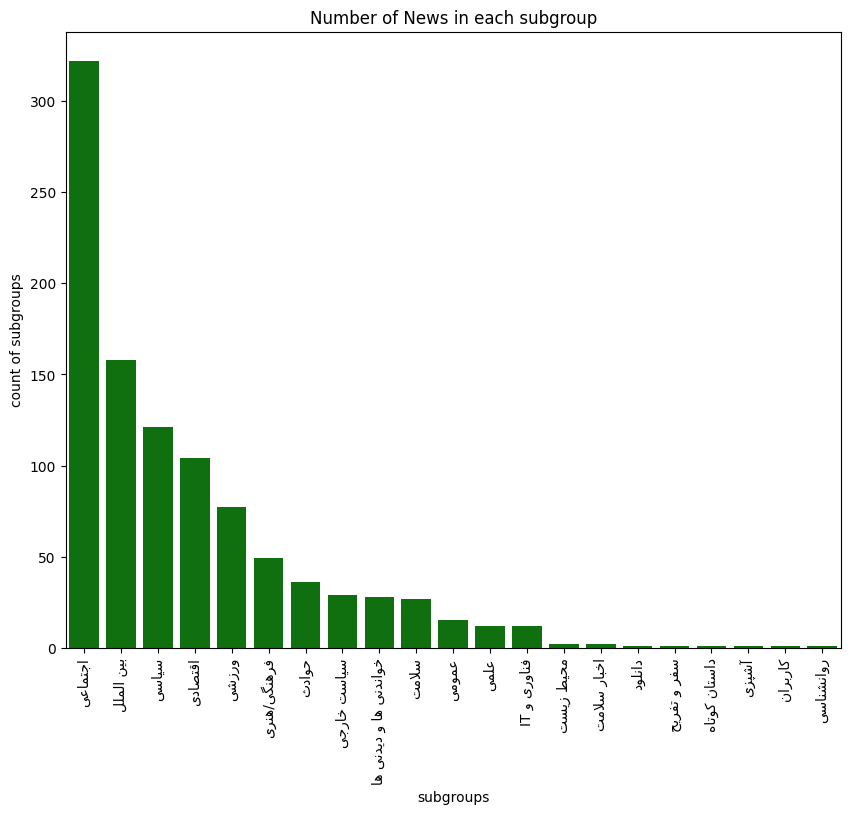

In [7]:
from bidi.algorithm import get_display
import arabic_reshaper
from arabic_reshaper import reshape
idx = train_data['subgroup'].value_counts().index
persian_label = [get_display(reshape(i)) for i in idx]
category_val = train_data['subgroup'].value_counts().values
plt.figure(figsize=(10, 8))
sns.barplot(x=persian_label, y=category_val, color='green')
plt.title("Number of News in each subgroup")
plt.xlabel('subgroups')
plt.ylabel('count of subgroups')
plt.xticks(rotation=90)
plt.show()

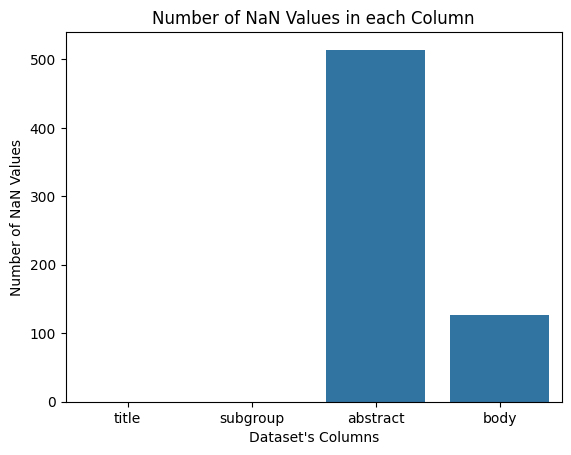

In [8]:
sns.barplot(x=train_data.isnull().sum().index, y=train_data.isnull().sum())
plt.title("Number of NaN Values in each Column")
plt.xlabel("Dataset's Columns")
plt.ylabel('Number of NaN Values')
plt.show()

In [9]:
train_data = train_data.drop('abstract', axis=1)

In [10]:
train_data = train_data.dropna()

In [11]:
train_data['description'] = [f"{row['title']} {row['body']}" for idx, row in train_data.iterrows()]

In [12]:
label_encoder = preprocessing.LabelEncoder()
train_data['labels'] = label_encoder.fit_transform(train_data['subgroup'])
train_data.head()

,title,subgroup,body,description,labels
189804,صدور کیفرخواست برای مدیرعامل گاز اردبیل,اجتماعی,دادستان عمومی و انقلاب مرکز استان اردبیل گفت: ...,صدور کیفرخواست برای مدیرعامل گاز اردبیل دادستا...,1
230456,با جدیدترین تکنولوژی های خط دروازه در فوتبال آ...,خواندنی ها و دیدنی ها,تکنولوژی خط دروازه در فوتبال به گونه ای طراحی ...,با جدیدترین تکنولوژی های خط دروازه در فوتبال آ...,6
1398,پایان فصل سوم عصر جدید / شنبه و یکشنبه آینده,فرهنگی/هنری,به نقل از روابط عمومی برنامه «عصرجدید»، شنبه و...,پایان فصل سوم عصر جدید / شنبه و یکشنبه آینده ب...,15
153428,فرانسه از پیشرفت در مذاکرات حل بحران اوکراین خ...,بین الملل,وزارت خارجه فرانسه روز چهارشنبه اعلام کرد: پیش...,فرانسه از پیشرفت در مذاکرات حل بحران اوکراین خ...,4
15884,خاص ترین پورشه کاررا جی تی جهان که 18 سال فقط ...,اقتصادی,از کمپانی جز خودروهایی محسوب می شود که به زحمت...,خاص ترین پورشه کاررا جی تی جهان که 18 سال فقط ...,3


In [13]:
label_dict = {i: j for i, j in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}
for key, value in label_dict.items():
  print(key,'->' ,value)

آشپزی -> 0
اجتماعی -> 1
اخبار سلامت -> 2
اقتصادی -> 3
بین الملل -> 4
حوادث -> 5
خواندنی ها و دیدنی ها -> 6
دانلود -> 7
روانشناسی -> 8
سفر و تفریح -> 9
سلامت -> 10
سیاست خارجی -> 11
سیاسی -> 12
علمی -> 13
عمومی -> 14
فرهنگی/هنری -> 15
فناوری و IT -> 16
ورزشی -> 17
کاربران -> 18


In [14]:
label_counts = [len(train_data[train_data['labels'] == i]) for i in range(23)]
label_counts

[1,
 266,
 2,
 91,
 153,
 33,
 12,
 1,
 1,
 1,
 26,
 29,
 110,
 11,
 9,
 45,
 10,
 71,
 1,
 0,
 0,
 0,
 0]

In [15]:
import string
import re
import hazm


class Preprocessing:
    def __init__(self):
        self.persian_punctuations = "`÷×؛<>_()*&^%][ـ،/:\"؟.,'{}~¦+|!”…“–ـ"
        self.punctuations_list = string.punctuation + self.persian_punctuations
        self.arabic_diacritics = re.compile(r"""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
        self.stop_words = hazm.stopwords_list()
        self.lemmatizer = hazm.Lemmatizer()

    def remove_diacritics(self, text):
        return re.sub(self.arabic_diacritics, '', text)

    def remove_punctuations(self, text):
        translator = str.maketrans('', '', self.punctuations_list)
        return text.translate(translator)

    def remove_repeating_char(self, text):
        return re.sub(r'(.)\1+', r'\1', text)

    def normalize_persian(self, text):
        text = re.sub("[إأآا]", "ا", text)
        text = re.sub("ي", "ی", text)
        text = re.sub("ؤ", "و", text)
        text = re.sub("ئ", "ی", text)
        text = re.sub("ة", "ه", text)
        text = re.sub("ك", "ک", text)
        text = re.sub("[^ابپتثجچحخدذرزژسشصضطظعغفقکگلمنوهی]", " ", text)
        text = re.sub(r"[^\S\n\t]+", ' ', text)
        return text

    def tokenize(self, text):
        return text.split()

    def remove_stopwords(self, words):
        return [word for word in words if word not in self.stop_words]

    def join_token(self, words):
      return ' '.join(words).strip()

    """def lemmatize(self, words):
        return list(set(self.lemmatizer.lemmatize(token) for token in words))"""

In [16]:
pre_procc = Preprocessing()
train_data['decription_proccess'] = train_data['description'].apply(pre_procc.remove_diacritics)
train_data['decription_proccess'] = train_data['decription_proccess'].apply(pre_procc.remove_punctuations)
train_data['decription_proccess'] = train_data['decription_proccess'].apply(pre_procc.remove_repeating_char)
train_data['decription_proccess'] = train_data['decription_proccess'].apply(pre_procc.normalize_persian)
train_data['decription_proccess'] = train_data['decription_proccess'].apply(pre_procc.tokenize)
train_data['decription_proccess'] = train_data['decription_proccess'].apply(pre_procc.remove_stopwords)
train_data['decription_proccess'] = train_data['decription_proccess'].apply(pre_procc.join_token)

In [17]:
train_data['decription_proccess'].iloc[10]

'ایتالیا درحال برسی قطع فروش اسلحه عربستان ایتالیا واکنش قتل جمال خاشقجی درحال ارزیابی قطع فروش اسلحه عربستان سعودی گزارش ایرنا انتزو مواورو میلانزی وزیر خارجه ایتالیا حاشیه کنفرانسی رم انتظار نتایج تحقیقات قتل جمال خاشقجی اظهار تردید ایتالیا ارزیابی متوقف فروش اسلحه عربستان سعودی همانطوری المان صادرات تسلیحاتی کشور قطع'

In [18]:
train_data['description'].iloc[10]

"ایتالیا: درحال بررسی قطع فروش اسلحه به عربستان هستیم ایتالیا در واکنش به قتل جمال خاشقجی درحال ارزیابی برای قطع فروش اسلحه به عربستان سعودی است. به گزارش ایرنا، 'انتزو موآورو میلانزی' وزیر خارجه ایتالیا در حاشیه کنفرانسی با بیان اینکه رم در انتظار نتایج تحقیقات در خصوص قتل جمال خاشقجی است، اظهار داشت: بی تردید ایتالیا در حال ارزیابی امکان متوقف کردن فروش اسلحه به عربستان سعودی است، همانطوری که آلمان صادرات تسلیحاتی خود را به این کشور قطع کرده است."

In [19]:
def evaluate_models(X_train, y_train, X_test, y_test):
    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
        'DecisionTree': DecisionTreeClassifier(random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=3),
        'SVM': SVC(),
        'Naïve Bayes': GaussianNB()
    }

    results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Confusion Matrix'])

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        y_pred_binary = (y_pred > 0.5).astype(int)
        y_pred_series = pd.Series(np.ravel(y_pred_binary))

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        conf_matrix = confusion_matrix(y_test, y_pred_series)

        results.loc[model_name] = [accuracy, precision, recall, f1, conf_matrix]

    return results

***# Bag of Words***

*Input: lists of sentenses*

*Output: Number of repetitions of each word in each sample*

The bag-of-words model converts text into fixed-length vectors by counting how many times each word appears.

Let us illustrate this with an example. Consider that we have the following sentences:

Text processing is necessary.

Text processing is necessary and important.

Text processing is easy.

We will refer to each of the above sentences as documents. If we take out the unique words in all these sentences, the vocabulary will consist of these 7 words: {‘Text’, ’processing’, ’is’, ’necessary’, ’and’, ’important, ’easy’}.

To carry out bag-of-words, we will simply have to count the number of times each word appears in each of the documents.

Limitations of Bag-of-Words:

1.If we deploy bag-of-words to generate vectors for large documents, the vectors would be of large sizes and would also have too many null values leading to the creation of sparse vectors.

2.Bag-of-words does not bring in any information on the meaning of the text. For example, if we consider these two sentences – “Text processing is easy but tedious.” and “Text processing is tedious but easy.” – a bag-of-words model would create the same vectors for both of them, even though they have different meanings.

#*Bag Of Words Using CountVectorizer*

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

coun_vect = CountVectorizer()
count_array = coun_vect.fit_transform(train_data['decription_proccess']).toarray()

In [21]:
# coun_vect.get_feature_names_out() is vocabulary
count_df = pd.DataFrame(data=count_array , columns = coun_vect.get_feature_names_out())
count_df.head(10)

,اب,ابا,اباد,ابادان,ابادانساعت,ابادانی,ابادتهران,ابادی,اباعبدا,ابان,...,یکم,یکماه,یکمین,یکنواخت,یکهزار,یکپارچه,یکپارچگی,یگان,یگانه,یی
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X_bag = count_df.values
X_train, X_test, y_train, y_test = train_test_split(X_bag, train_data['labels'], test_size=0.2, random_state=42)

In [23]:
evaluate_models(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
Logistic Regression,0.634286,0.658637,0.634286,0.611564,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
Random Forest,0.617143,0.608756,0.617143,0.558471,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
Gradient Boosting,0.565714,0.570870,0.565714,0.533899,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
DecisionTree,0.474286,0.458226,0.474286,0.464071,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
KNN,0.451429,0.488572,0.451429,0.393859,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
SVM,0.468571,0.489828,0.468571,0.397670,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
Naïve Bayes,0.548571,0.549196,0.548571,0.498567,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."


#*Tfidf*

Term Frequency: Term frequency is defined as the number of times a word (i) appears in a document (j) divided by the total number of words in the document.

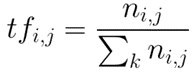

Inverse Document Frequency: Inverse document frequency refers to the log of the total number of documents divided by the number of documents that contain the word. The logarithm is added to dampen the importance of a very high value of IDF.

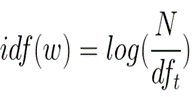

TFIDF is computed by multiplying the term frequency with the inverse document frequency.

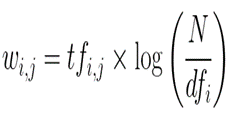

Limitation:

The limitation of TFIDF is again that this vectorization doesn’t help in bringing in the contextual meaning of the words as it is just based on the frequency.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vect = TfidfVectorizer()
tf_array  = tf_vect.fit_transform(train_data['decription_proccess']).toarray()

In [25]:
tf_df = pd.DataFrame(data=tf_array , columns = tf_vect.get_feature_names_out())
tf_df.head(10)

,اب,ابا,اباد,ابادان,ابادانساعت,ابادانی,ابادتهران,ابادی,اباعبدا,ابان,...,یکم,یکماه,یکمین,یکنواخت,یکهزار,یکپارچه,یکپارچگی,یگان,یگانه,یی
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.162752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
X = tf_df.values
X_train, X_test, y_train, y_test = train_test_split(X, train_data['labels'], test_size=0.2, random_state=42)

In [29]:
evaluate_models(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
Logistic Regression,0.600000,0.597626,0.600000,0.539068,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
Random Forest,0.622857,0.662523,0.622857,0.573858,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
Gradient Boosting,0.531429,0.540226,0.531429,0.514519,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
DecisionTree,0.440000,0.404534,0.440000,0.415988,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
KNN,0.634286,0.643435,0.634286,0.621304,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
SVM,0.554286,0.612283,0.554286,0.494868,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
Naïve Bayes,0.554286,0.562545,0.554286,0.510375,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."


#***Word Embedding***

Word embeddings are dense vector representations of words that capture semantic and syntactic relationships between words. Unlike BoW and TF-IDF, word embeddings are learned from large amounts of text data using techniques like Embedding Layer, Word2Vec, GloVe, or BERT. Each word is represented as a fixed-size vector in a continuous vector space, where similar words are closer to each other. Word embeddings capture the contextual and semantic meaning of words, allowing for more nuanced representations. They are often pre-trained on large corpora and can be used as features in various NLP tasks or fine-tuned on specific tasks.

#**Word2Vec**
Even though Word2Vec is an unsupervised model where you can give a corpus without any label information and the model can create dense word embeddings, Word2Vec internally leverages a supervised classification model to get these embeddings from the corpus.

Let us consider the two sentences – “You can scale your business.” and “You can grow your business.”. These two sentences have the same meaning. If we consider a vocabulary considering these two sentences, it will constitute of these words: {You, can, scale, grow, your, business}.

A one-hot encoding of these words would create a vector of length 6. The encodings for each of the words would look like this:

You: [1,0,0,0,0,0], Can: [0,1,0,0,0,0], Scale: [0,0,1,0,0,0], Grow: [0,0,0,1,0,0], Your: [0,0,0,0,1,0], Business: [0,0,0,0,0,1]

In a 6-dimensional space, each word would occupy one of the dimensions, meaning that none of these words has any similarity with each other – irrespective of their literal meanings.

Word2Vec, a word embedding methodology, solves this issue and enables similar words to have similar dimensions and, consequently, helps bring context. **1.


CBOW:**

The CBOW architecture comprises a deep learning classification model in which we take in context words as input, X, and try to predict our target word, Y.


For example, if we consider the sentence – “Word2Vec has a deep learning model working in the backend.”, there can be pairs of context words and target (center) words. If we consider a context window size of 2, we will have pairs like ([deep, model], learning), ([model, in], working), ([a, learning), deep) etc. The deep learning model would try to predict these target words based on the context words.

**2.Skip-gram:**

In the skip-gram model, given a target (centre) word, the context words are predicted. So, considering the same sentence – “Word2Vec has a deep learning model working in the backend.” and a context window size of 2, given the centre word ‘learning’, the model tries to predict [‘deep’, ’model’] and so on.

Since the skip-gram model has to predict multiple words from a single given word, we feed the model pairs of (X, Y) where X is our input and Y is our label. This is done by creating positive input samples and negative input samples.

Positive Input Samples will have the training data in this form: [(target, context),1] where the target is the target or centre word, context represents the surrounding context words, and label 1 indicates if it is a relevant pair. Negative Input Samples will have the training data in the same form: [(target, random),0]. In this case, instead of the actual surrounding words, randomly selected words are fed in along with the target words with a label of 0 indicating that it’s an irrelevant pair.

These samples make the model aware of the contextually relevant words and consequently generate similar embeddings for similar meaning words.

In [30]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

nltk.download('punkt')


X_word2vec = train_data['decription_proccess'].apply(word_tokenize)
X_train, X_test, y_train, y_test = train_test_split(X_word2vec, train_data['labels'], test_size=0.2, random_state=42)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [31]:
w2v_model = gensim.models.Word2Vec(X_train, min_count=1, vector_size=100, window=5, sg=0)
#model2 = gensim.models.Word2Vec(pre_procc_sen, min_count = 1, size = 100, window = 5, sg = 1)   #skip-gram

In [32]:
feature_vectors = []
for sen in X_train:
  vectors = [w2v_model.wv[word] for word in sen if word in w2v_model.wv]

  if vectors:
    feature_vectors.append(sum(vectors) / len(vectors))

  else:
    sum(vectors) / len(vectors)

In [33]:
# Create feature vectors for test data
test_feature_vectors = []

for sen in X_test:
  vectors = [w2v_model.wv[word] for word in sen if word in w2v_model.wv]
  if vectors:
     test_feature_vectors.append(sum(vectors) / len(vectors))
  else:
    test_feature_vectors.append([0] * 100)  # Use zero vector if no word is found

In [34]:
evaluate_models(feature_vectors, y_train, test_feature_vectors, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
Logistic Regression,0.314286,0.270100,0.314286,0.160588,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
Random Forest,0.422857,0.398708,0.422857,0.386163,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
Gradient Boosting,0.468571,0.474884,0.468571,0.450831,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
DecisionTree,0.337143,0.349493,0.337143,0.337991,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
KNN,0.302857,0.368540,0.302857,0.266494,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
SVM,0.314286,0.098776,0.314286,0.150311,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
Naïve Bayes,0.091429,0.081073,0.091429,0.050926,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."


#PARS BERT


In [35]:
!pip install -qU transformers
!pip install -qU sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 473.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 306.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 377.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 513.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 805.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━ 122.3/196.0 MB 1.1 MB/s eta 0:01:08
ERROR: Operation cancelled by user


In [36]:
from transformers import BertConfig, BertTokenizer
from transformers import BertModel

from transformers import AdamW
from transformers import get_linear_schedule_with_warmup

import torch
import torch.nn as nn
import torch.nn.functional as F
import os

In [37]:
# general config
MAX_LEN = 128
TRAIN_BATCH_SIZE = 16
VALID_BATCH_SIZE = 16
TEST_BATCH_SIZE = 16

EPOCHS = 3
EEVERY_EPOCH = 1000
LEARNING_RATE = 2e-5
CLIP = 0.0

MODEL_NAME_OR_PATH = 'HooshvareLab/bert-fa-base-uncased-clf-persiannews'
OUTPUT_PATH = '/content/bert-fa-base-uncased-clf-persiannews/pytorch_model.bin'

os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)

In [38]:
from transformers import BertModel, BertTokenizer

tokenizer = BertTokenizer.from_pretrained(MODEL_NAME_OR_PATH)
config = BertConfig.from_pretrained(MODEL_NAME_OR_PATH)

print(config.to_json_string())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.20M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

{
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "finetuning_task": "persiannews",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "\u0627\u062c\u062a\u0645\u0627\u0639\u06cc",
    "1": "\u0627\u0642\u062a\u0635\u0627\u062f\u06cc",
    "2": "\u0628\u06cc\u0646 \u0627\u0644\u0645\u0644\u0644",
    "3": "\u0633\u06cc\u0627\u0633\u06cc",
    "4": "\u0639\u0644\u0645\u06cc \u0641\u0646\u0627\u0648\u0631\u06cc",
    "5": "\u0641\u0631\u0647\u0646\u06af\u06cc \u0647\u0646\u0631\u06cc",
    "6": "\u0648\u0631\u0632\u0634\u06cc",
    "7": "\u067e\u0632\u0634\u06a9\u06cc"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "\u0627\u062c\u062a\u0645\u0627\u0639\u06cc": 0,
    "\u0627\u0642\u062a\u0635\u0627\u062f\u06cc": 1,
    "\u0628\u06cc\u0646 \u0627\u0644\u0645\u0644\u0644": 2,
    "\u0633

##Create Dataset

In [39]:
from torch.utils.data import Dataset

class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts[index]
        label = self.labels[index]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_len,
            padding='max_length',
            return_tensors='pt'
        )

        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'label': label
        }



In [40]:
X_train, X_test, y_train, y_test = train_test_split(train_data['decription_proccess'], train_data['labels'], test_size=0.2, random_state=42)
X_train, y_train, X_test, y_test = X_train.tolist(), y_train.tolist(), X_test.tolist(), y_test.tolist()

In [41]:
train_dataset = NewsDataset(X_train, y_train, tokenizer, max_len=128)
test_dataset = NewsDataset(X_test, y_test, tokenizer, max_len=128)

In [42]:
model = BertModel.from_pretrained(MODEL_NAME_OR_PATH)
model.eval()

pytorch_model.bin:   0%|          | 0.00/651M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(100000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
 

In [43]:
def generate_embeddings(model, dataset):
    embeddings = []

    for example in dataset:
        input_ids = example['input_ids'].unsqueeze(0)
        attention_mask = example['attention_mask'].unsqueeze(0)

        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()

        embeddings.append(cls_embedding)

    return np.array(embeddings)

In [44]:
X_train = generate_embeddings(model, train_dataset)
y_train = np.array(y_train)

In [45]:
X_test = generate_embeddings(model, test_dataset)
y_test = np.array(y_test)

In [46]:
evaluate_models(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
Logistic Regression,0.674286,0.659579,0.674286,0.659277,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
Random Forest,0.674286,0.679988,0.674286,0.645099,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
Gradient Boosting,0.674286,0.671732,0.674286,0.656050,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]..."
DecisionTree,0.520000,0.542718,0.520000,0.526549,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
KNN,0.634286,0.602786,0.634286,0.613317,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
SVM,0.662857,0.602392,0.662857,0.623640,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
Naïve Bayes,0.537143,0.649910,0.537143,0.542586,"[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ..."
